<a href="https://colab.research.google.com/github/alexandre-pinon/deep-learning-learning/blob/master/ztm/02_neural_network_classification_in_tensorflow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In this notebook, we're going to work through a number of different classification problems with TensorFlow. In other words, taking a set of inputs and predicting what class those set of inputs belong to.

In [1]:
import tensorflow as tf
print(tf.__version__)

2.8.0


# Creating data to view and fit
We could start by importing a classification dataset but let's practice making some of our own classification data.

>🔑 Note: It's a common practice to get you and model you build working on a toy (or simple) dataset before moving to your actual problem. Treat it as a rehersal experiment before the actual experiment(s).

Since classification is predicting whether something is one thing or another, let's make some data to reflect that.

To do so, we'll use Scikit-Learn's make_circles() function

In [2]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples, 
                    noise=0.03, 
                    random_state=42)

In [3]:
X.shape

(1000, 2)

In [4]:
y.shape

(1000,)

In [5]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [6]:
df = pd.DataFrame({'X0': X[:, 0], 'X1': X[:, 1], 'y': y})
df.head()

,X0,X1,y
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [7]:
df['y'].value_counts()

1    500
0    500
Name: y, dtype: int64

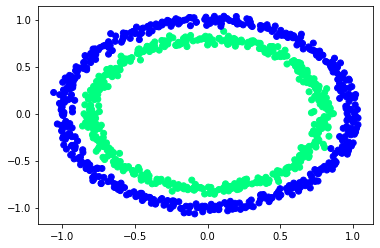

In [8]:
plt.scatter(df['X0'], df['X1'], c=df['y'], cmap='winter')

In [9]:
from sklearn.model_selection import train_test_split

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [11]:
print(f'X_train shape: {X_train.shape}')
print(f'X_test shape: {X_test.shape}')
print(f'y_train shape: {y_train.shape}')
print(f'y_test shape: {y_test.shape}')

X_train shape: (800, 2)
X_test shape: (200, 2)
y_train shape: (800,)
y_test shape: (200,)


In [12]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential(name='circles_1')
model.add(tf.keras.layers.Dense(4, activation='gelu')) # FOR THIS PROBLEM -> gelu > elu > relu > selu ??
model.add(tf.keras.layers.Dense(1, activation='gelu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Why sigmoid ?

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.03),
                metrics='accuracy')


# 3. Fit the model
history = model.fit(X_train, y_train, epochs=20, verbose=0) # Only 8 epochs ??
model.summary()

Model: "circles_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (32, 4)                   12        
                                                                 
 dense_1 (Dense)             (32, 1)                   5         
                                                                 
 dense_2 (Dense)             (32, 1)                   2         
                                                                 
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [13]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 2ms/step - loss: 0.0241 - accuracy: 1.0000


[0.02410306967794895, 1.0]

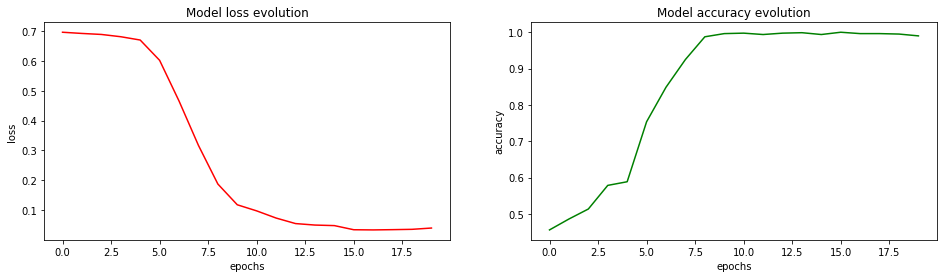

In [14]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
pd.DataFrame(history.history)['loss'].plot(c='r')
plt.title('Model loss evolution')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
pd.DataFrame(history.history)['accuracy'].plot(c='g')
plt.title('Model accuracy evolution')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

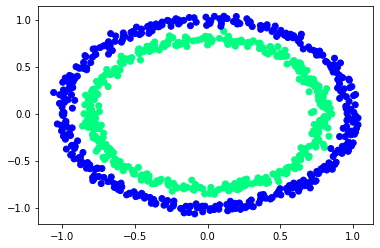

In [15]:
y_pred = model.predict(X_test)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap='winter')

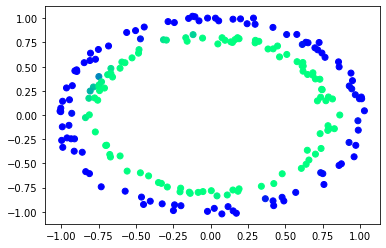

In [16]:
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_pred, cmap='winter')

In [17]:
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  This function has been adapted from two phenomenal resources:
   1. CS231n - https://cs231n.github.io/neural-networks-case-study/
   2. Made with ML basics - https://github.com/GokuMohandas/MadeWithML/blob/main/notebooks/08_Neural_Networks.ipynb
  """
  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to predict on all of these)
  x_in = np.c_[xx.ravel(), yy.ravel()] # stack 2D arrays together: https://numpy.org/devdocs/reference/generated/numpy.c_.html
  
  # Make predictions using the trained model
  y_pred = model.predict(x_in)

  # Check for multi-class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification...")
    # We have to reshape our predictions to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classifcation...")
    y_pred = np.round(y_pred).reshape(xx.shape)
  
  # Plot decision boundary
  plt.figure(figsize=(16, 8))
  plt.box(False)
  plt.axis('off')
  plt.contourf(xx, yy, y_pred, cmap='PiYG', alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap='PiYG')
  plt.colorbar()
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  plt.show()

doing binary classifcation...


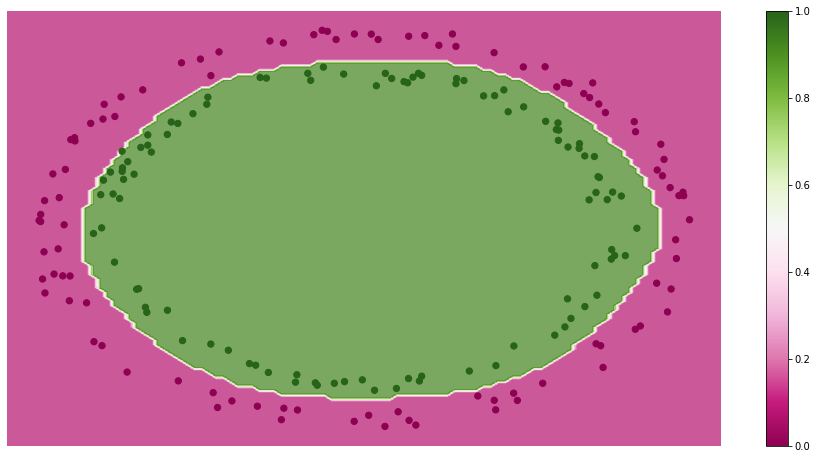

In [18]:
plot_decision_boundary(model, X_test, y_test)

>🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

## Finding the best learning rate
Aside from the architecture itself (the layers, number of neurons, activations, etc), the most important hyperparameter you can tune for your neural network models is the **learning rate**.

In `model_8` you saw we lowered the Adam optimizer's learning rate from the default of `0.001` (default) to `0.01`.

And you might be wondering why we did this.

Put it this way, it was a lucky guess.

I just decided to try a lower learning rate and see how the model went.

Now you might be thinking, "Seriously? You can do that?"

And the answer is yes. You can change any of the hyperparamaters of your neural networks.

With practice, you'll start to see what kind of hyperparameters work and what don't.

That's an important thing to understand about machine learning and deep learning in general. It's very experimental. You build a model and evaluate it, build a model and evaluate it.

That being said, I want to introduce you a trick which will help you find the optimal learning rate (at least to begin training with) for your models going forward.

To do so, we're going to use the following:

- A learning rate callback.
  - You can think of a callback as an extra piece of functionality you can add to your model while its training.
- Another model (we could use the same ones as above, we we're practicing building models here).
- A modified loss curves plot.

We'll go through each with code, then explain what's going on.

>🔑 **Note**: The default hyperparameters of many neural network building blocks in TensorFlow are setup in a way which usually work right out of the box (e.g. the Adam optimizer's default settings can usually get good results on many datasets). So it's a good idea to try the defaults first, then adjust as needed.

In [19]:
# Set random seed
tf.random.set_seed(42)
TOTAL_EPOCHS = 100

model = tf.keras.Sequential(name='circles_1')
model.add(tf.keras.layers.Dense(4, activation='gelu')) # FOR THIS PROBLEM -> gelu > elu > relu > selu ??
model.add(tf.keras.layers.Dense(1, activation='gelu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Why sigmoid ?

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')

# Create a learning rate scheduler callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(4 * epoch / TOTAL_EPOCHS)) # traverse a set of learning rate values star

# 3. Fit the model
history = model.fit(X_train, y_train, epochs=TOTAL_EPOCHS, verbose=0, callbacks=[lr_scheduler])

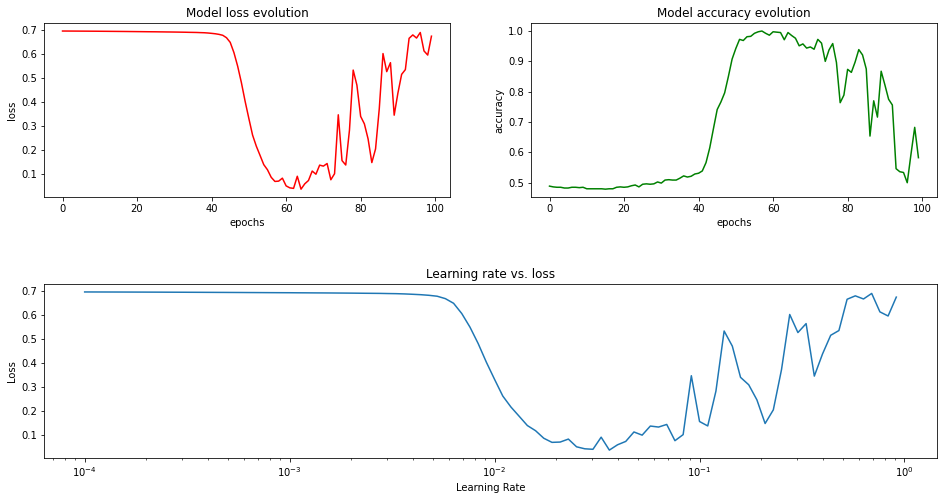

In [20]:
plt.figure(figsize=(16, 8))

plt.subplot(2, 2, 1)
pd.DataFrame(history.history)['loss'].plot(c='r')
plt.title('Model loss evolution')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(2, 2, 2)
pd.DataFrame(history.history)['accuracy'].plot(c='g')
plt.title('Model accuracy evolution')
plt.xlabel('epochs')
plt.ylabel('accuracy')

# Plot the learning rate versus the loss
plt.subplot(2, 1, 2)
lrs = 1e-4 * 10 ** (4 * np.arange(TOTAL_EPOCHS) / TOTAL_EPOCHS)
plt.semilogx(lrs, history.history["loss"]) # we want the x-axis (learning rate) to be log scale
plt.title("Learning rate vs. loss");
plt.xlabel("Learning Rate")
plt.ylabel("Loss")

plt.subplots_adjust(hspace=0.5)
plt.show()

To figure out the ideal value of the learning rate (at least the ideal value to begin training our model), the rule of thumb is to take the learning rate value where the loss is still decreasing but not quite flattened out (usually about 10x smaller than the bottom of the curve).

In this case, our ideal learning rate ends up between `0.01` () and `0.02`.

In [21]:
# Set random seed
tf.random.set_seed(42)

model = tf.keras.Sequential(name='circles_1')
model.add(tf.keras.layers.Dense(4, activation='gelu')) # FOR THIS PROBLEM -> gelu > elu > relu > selu ??
model.add(tf.keras.layers.Dense(1, activation='gelu'))
model.add(tf.keras.layers.Dense(1, activation='sigmoid')) # Why sigmoid ?

# 2. Compile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.01),
                metrics='accuracy')


# 3. Fit the model
history = model.fit(X_train, y_train, epochs=20, verbose=0)

In [22]:
model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.4566 - accuracy: 0.7800


[0.4565625786781311, 0.7799999713897705]

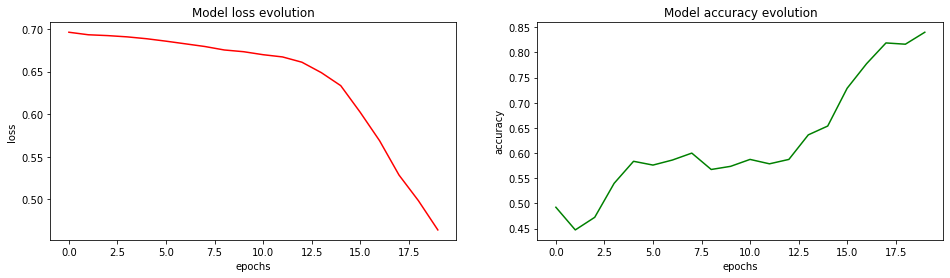

In [23]:
plt.figure(figsize=(16, 4))

plt.subplot(1, 2, 1)
pd.DataFrame(history.history)['loss'].plot(c='r')
plt.title('Model loss evolution')
plt.xlabel('epochs')
plt.ylabel('loss')

plt.subplot(1, 2, 2)
pd.DataFrame(history.history)['accuracy'].plot(c='g')
plt.title('Model accuracy evolution')
plt.xlabel('epochs')
plt.ylabel('accuracy')

plt.show()

doing binary classifcation...


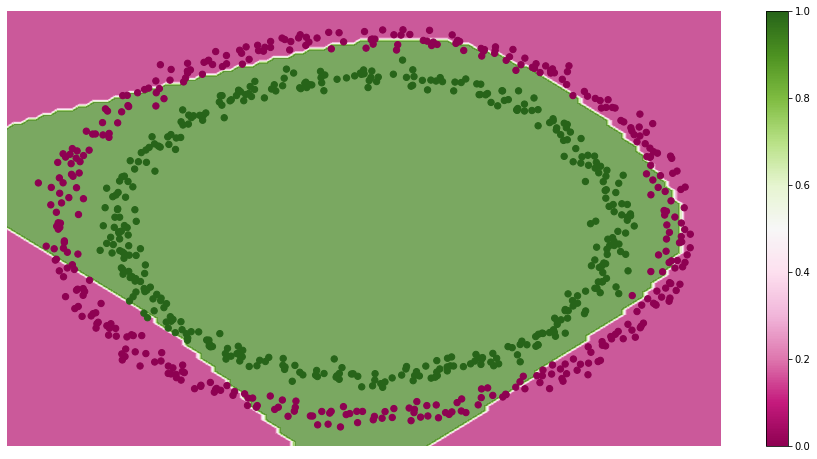

doing binary classifcation...


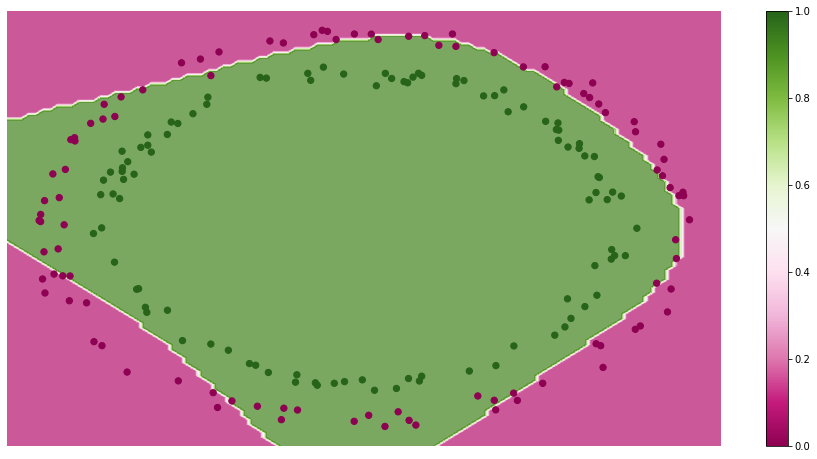

In [24]:
plot_decision_boundary(model, X=X_train, y=y_train)
plot_decision_boundary(model, X=X_test, y=y_test)

In [25]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [26]:
y_pred = np.round(model.predict(X_test))

In [27]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)*100:.2f}%')
print(f'Precision: {precision_score(y_test, y_pred)*100:.2f}%')
print(f'Recall: {recall_score(y_test, y_pred)*100:.2f}%')
print(f'F1: {f1_score(y_test, y_pred)*100:.2f}%')

Accuracy: 78.00%
Precision: 69.66%
Recall: 100.00%
F1: 82.11%


In [28]:
from sklearn.metrics import confusion_matrix

In [29]:
cm = confusion_matrix(y_test, y_pred)

In [30]:
import seaborn as sns

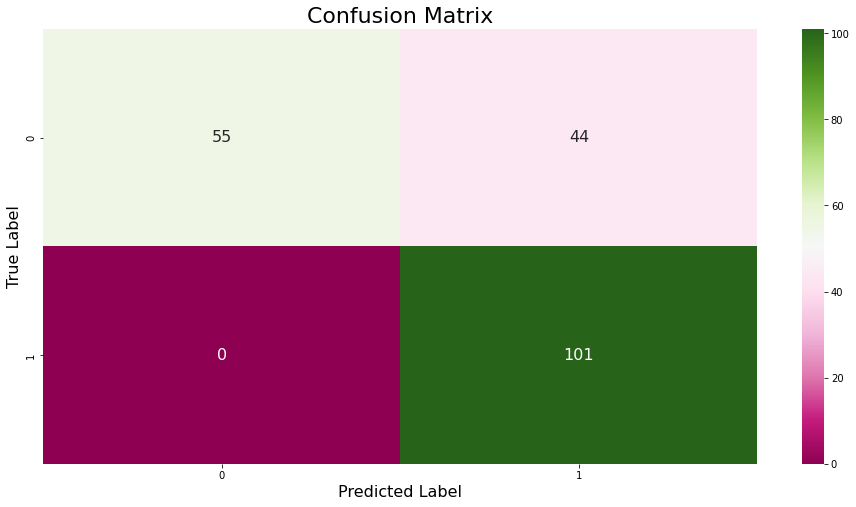

In [31]:
plt.figure(figsize=(16, 8))
sns.heatmap(cm, cmap='PiYG', annot=True, fmt='.0f', annot_kws={'size': 16})
plt.title('Confusion Matrix', fontsize=22)
plt.xlabel('Predicted Label', fontsize=16)
plt.ylabel('True Label', fontsize=16)
plt.show()

# Working with a larger example (multiclass classification)
We've seen a binary classification example (predicting if a data point is part of a red circle or blue circle) but what if you had multiple different classes of things?

For example, say you were a fashion company and you wanted to build a neural network to predict whether a piece of clothing was a shoe, a shirt or a jacket (3 different options).

When you have more than two classes as an option, this is known as multiclass classification.

The good news is, the things we've learned so far (with a few tweaks) can be applied to multiclass classification problems as well.

Let's see it in action.

To start, we'll need some data. The good thing for us is TensorFlow has a multiclass classication dataset known as Fashion MNIST built-in. Meaning we can get started straight away.

We can import it using the tf.keras.datasets module.

>📖 **Resource**: The following multiclass classification problem has been adapted from the TensorFlow classification guide. A good exercise would be to once you've gone through the following example, replicate the TensorFlow guide.

In [32]:
import tensorflow as tf
from tensorflow.keras.datasets import fashion_mnist

# The data has already been sorted into training and test sets for us
(train_data, train_labels), (test_data, test_labels) = fashion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [33]:
print(f'train_data shape: {train_data.shape}')
print(f'train_labels shape: {train_labels.shape}')
print(f'test_data shape: {test_data.shape}')
print(f'test_labels shape: {test_labels.shape}')

train_data shape: (60000, 28, 28)
train_labels shape: (60000,)
test_data shape: (10000, 28, 28)
test_labels shape: (10000,)


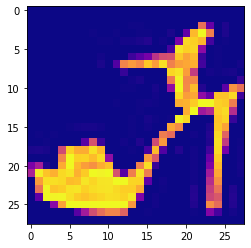

In [34]:
plt.imshow(train_data[9], cmap='plasma')

In [35]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

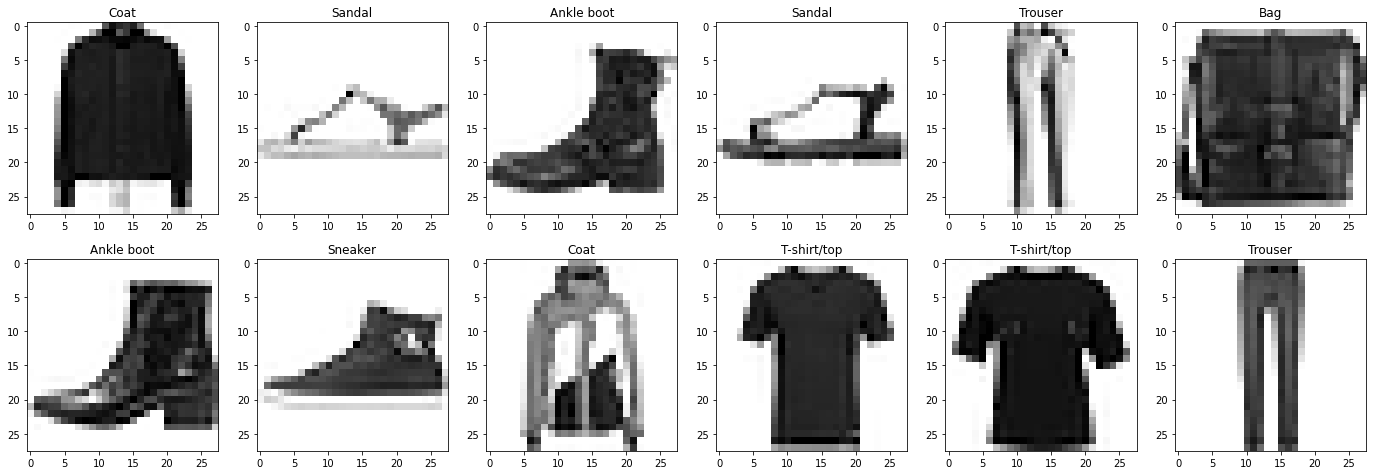

In [36]:
# Plot multiple random images of fashion MNIST
import random
plt.figure(figsize=(24, 8))
for i in range(12):
  ax = plt.subplot(2, 6, i + 1)
  rand_index = random.choice(range(len(train_data)))
  plt.imshow(train_data[rand_index], cmap=plt.cm.binary)
  plt.title(class_names[train_labels[rand_index]])
  # plt.axis(False)

Alright, let's build a model to figure out the relationship between the pixel values and their labels.

Since this is a multiclass classification problem, we'll need to make a few changes to our architecture (inline with Table 1 above):

- The **input shape** will have to deal with 28x28 tensors (the height and width of our images).
  - We're actually going to squash the input into a tensor (vector) of shape (784).
- The **output shape** will have to be 10 because we need our model to predict for 10 different classes.
  - We'll also change the activation parameter of our output layer to be "softmax" instead of 'sigmoid'. As we'll see the "softmax" activation function outputs a series of values between 0 & 1 (the same shape as output shape, which together add up to ~1. The index with the highest value is predicted by the model to be the most likely class.
- We'll need to change our loss function from a binary loss function to a multiclass loss function.
  - More specifically, since our labels are in integer form, we'll use tf.keras.losses.SparseCategoricalCrossentropy(), if our labels were one-hot encoded (e.g. they looked something like [0, 0, 1, 0, 0...]), we'd use tf.keras.losses.CategoricalCrossentropy().
- We'll also use the validation_data parameter when calling the fit() function. This will give us an idea of how the model performs on the test set during training.

In [37]:
# Set random seed
tf.random.set_seed(42)
TOTAL_EPOCHS = 10

model = tf.keras.Sequential(name='fashion_mnist_1')
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
model.add(tf.keras.layers.Dense(4, activation='relu')) # FOR THIS PROBLEM -> gelu > elu > relu > selu ??
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

# 2. Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')


# 3. Fit the model
history = model.fit(train_data, train_labels, epochs=TOTAL_EPOCHS, validation_data=(test_data, test_labels)) # see how the model performs on the test set during training)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 2.1671 - accuracy: 0.1606 - val_loss: 1.7959 - val_accuracy: 0.2046
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.7066 - accuracy: 0.2509 - val_loss: 1.6567 - val_accuracy: 0.2805
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6321 - accuracy: 0.2806 - val_loss: 1.6094 - val_accuracy: 0.2857
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.6052 - accuracy: 0.2833 - val_loss: 1.6041 - val_accuracy: 0.2859
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5975 - accuracy: 0.2862 - val_loss: 1.6064 - val_accuracy: 0.2756
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5950 - accuracy: 0.2920 - val_loss: 1.5747 - val_accuracy: 0.2994
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.5775 - accuracy: 0.3040 - val_loss: 1.6030 - val_accuracy:

In [38]:
model.summary()

Model: "fashion_mnist_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense_9 (Dense)             (None, 4)                 3140      
                                                                 
 dense_10 (Dense)            (None, 4)                 20        
                                                                 
 dense_11 (Dense)            (None, 10)                50        
                                                                 
Total params: 3,210
Trainable params: 3,210
Non-trainable params: 0
_________________________________________________________________


In [39]:
train_data_norm = tf.divide(train_data, train_data.max())
test_data_norm = tf.divide(test_data, test_data.max())

In [40]:
# Set random seed
tf.random.set_seed(42)
TOTAL_EPOCHS = 10

model = tf.keras.Sequential(name='fashion_mnist_2')
model.add(tf.keras.layers.Flatten(input_shape=(28, 28))) # input layer (we had to reshape 28x28 to 784, the Flatten layer does this for us)
model.add(tf.keras.layers.Dense(4, activation='relu')) # FOR THIS PROBLEM -> gelu > elu > relu > selu ??
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(len(class_names), activation='softmax'))

# 2. Compile the model
model.compile(loss=tf.keras.losses.SparseCategoricalCrossentropy(), # binary since we are working with 2 clases (0 & 1)
                optimizer=tf.keras.optimizers.Adam(),
                metrics='accuracy')


# 3. Fit the model
history = model.fit(train_data_norm, train_labels, epochs=TOTAL_EPOCHS, validation_data=(test_data_norm, test_labels)) # see how the model performs on the test set during training)

Epoch 1/10
1875/1875 [==============================] - 4s 2ms/step - loss: 1.0348 - accuracy: 0.6474 - val_loss: 0.6937 - val_accuracy: 0.7617
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6376 - accuracy: 0.7757 - val_loss: 0.6400 - val_accuracy: 0.7820
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5942 - accuracy: 0.7914 - val_loss: 0.6247 - val_accuracy: 0.7783
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5750 - accuracy: 0.7979 - val_loss: 0.6078 - val_accuracy: 0.7881
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5641 - accuracy: 0.8006 - val_loss: 0.6169 - val_accuracy: 0.7881
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.5544 - accuracy: 0.8043 - val_loss: 0.5855 - val_accuracy: 0.7951
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5488 - accuracy: 0.8063 - val_loss: 0.6097 - val_accuracy: